<a href="https://colab.research.google.com/github/pandian-raja/EVA4_Session15/blob/master/Depth_Only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/pandian-raja/EVA4_Session15.git


Cloning into 'EVA4_Session15'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 93 (delta 42), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (93/93), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [18]:
!pip install torchsummary
from torchsummary import summary


In [3]:
%cd EVA4_Session15

/content/EVA4_Session15


In [0]:
import GetData2 as gd
import model.RGBmodel as rg
import utils as util
from torch import nn
from torch.optim.lr_scheduler import StepLR
import torch


In [0]:

device = torch.device('cuda:0')
model = rg.ResNetInspired(rg.BasicBlock, [1,1,1,1]).to(device)
# summary(model, (3, 128, 128))

In [0]:
def train(model, criterion, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, data in enumerate(train_loader):
        data["f1"] = data["f1"].to(device)
        data["f2"] = data["f2"].to(device)
        data["f3"] = data["f3"].to(device)
        data["f4"] = data["f4"].to(device)
        optim.zero_grad()
        output = model(data)
        loss1 = criterion(output[0], data["f4"])
        # print(output.shape)
        # print(data["f3"].shape)
        loss1.backward()
        # loss2 = criterion(output[1], data["f4"])
        # print(output[1].shape)
        # print(data["f4"].shape)
        
        # loss = 2*loss1+loss2
        # loss.backward()
        optim.step()
        if batch_idx % 500 == 0:
            print(loss1)
            # print(loss2)
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\t Loss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100.*batch_idx/ len(train_loader), loss1.item()))
            print('Batch ID:', batch_idx)
            # img_grid1 = tensorboardImage(output[0].detach().cpu(), nrow=2) #nrow = sqrt-bs
            # img_grid2 = tensorboardImage(output[1].detach().cpu(), nrow=2) #nrow = sqrt-bs
            # writer.add_image('Mask', img_grid1)
            # writer.add_image('Depth', img_grid2)
            util.show_pred(output.detach().cpu(), nrow=2) #nrow = sqrt-bs
            # show_pred(output[1].detach().cpu(), nrow=2) #nrow = sqrt-bs


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.7563, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 1 [0/40000 (0%)]	 Loss: 0.756307
Batch ID: 0


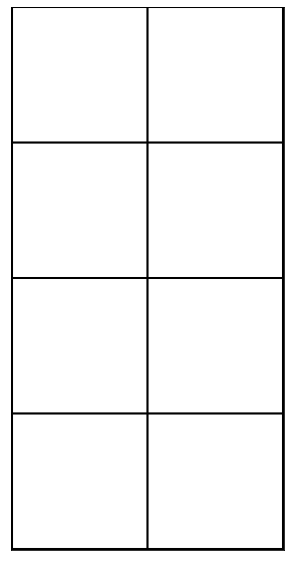

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6477, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 1 [2000/40000 (10%)]	 Loss: 0.647655
Batch ID: 500


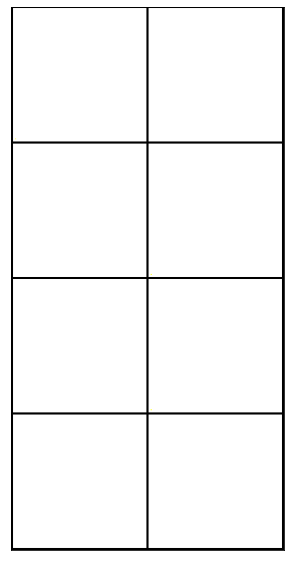

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6404, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 1 [4000/40000 (20%)]	 Loss: 0.640412
Batch ID: 1000


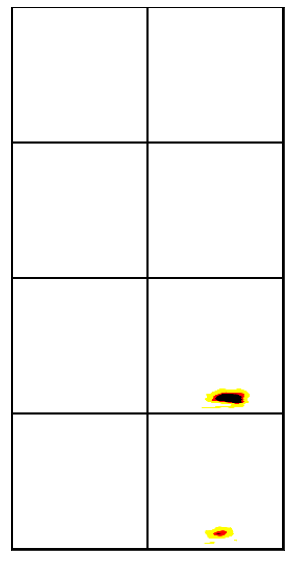

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6241, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 1 [6000/40000 (30%)]	 Loss: 0.624114
Batch ID: 1500


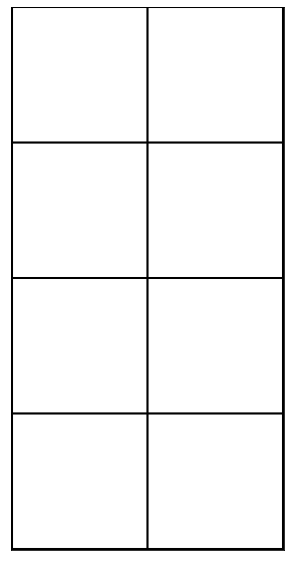

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6243, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 1 [8000/40000 (40%)]	 Loss: 0.624276
Batch ID: 2000


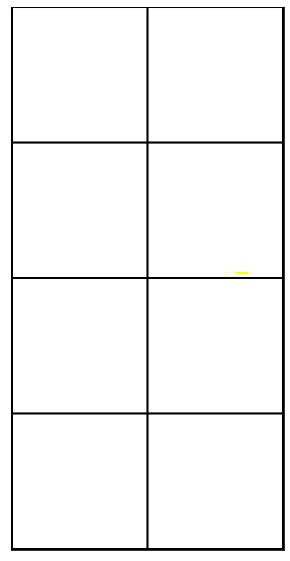

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6334, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 1 [10000/40000 (50%)]	 Loss: 0.633357
Batch ID: 2500


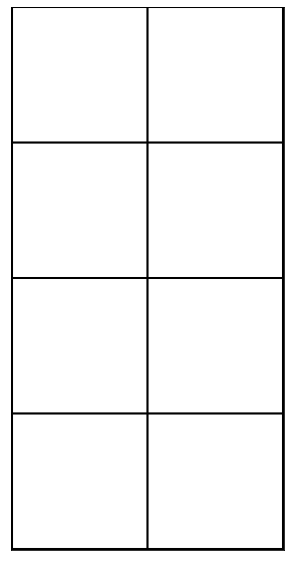

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6434, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 1 [12000/40000 (60%)]	 Loss: 0.643372
Batch ID: 3000


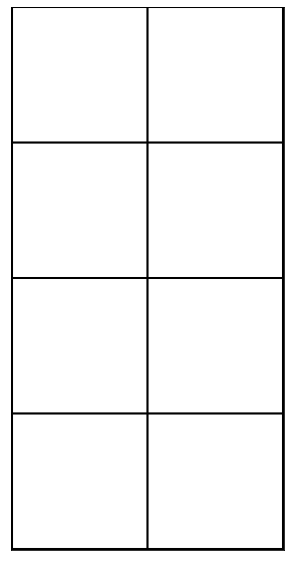

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6549, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 1 [14000/40000 (70%)]	 Loss: 0.654857
Batch ID: 3500


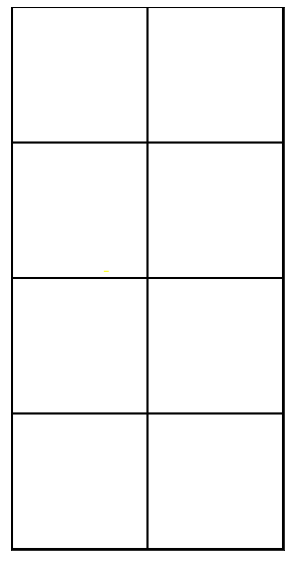

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6136, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 1 [16000/40000 (80%)]	 Loss: 0.613601
Batch ID: 4000


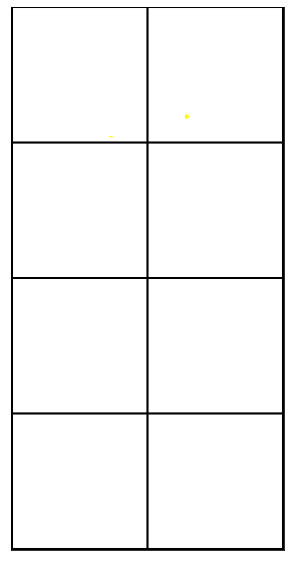

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6300, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 1 [18000/40000 (90%)]	 Loss: 0.630045
Batch ID: 4500


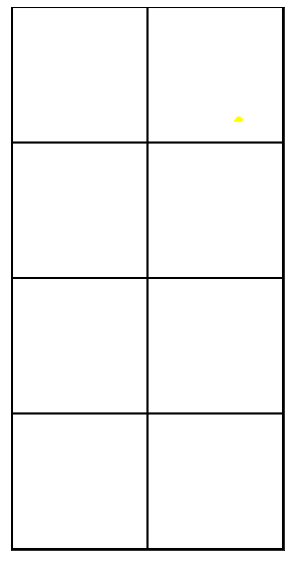

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.5776, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 2 [0/40000 (0%)]	 Loss: 0.577639
Batch ID: 0


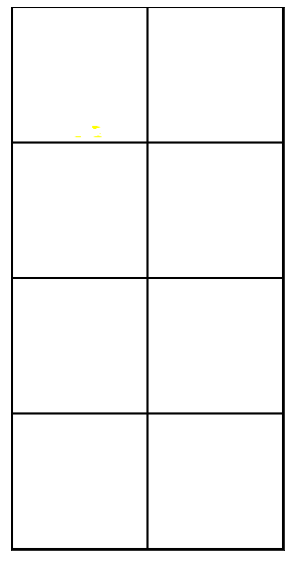

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6036, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 2 [2000/40000 (10%)]	 Loss: 0.603590
Batch ID: 500


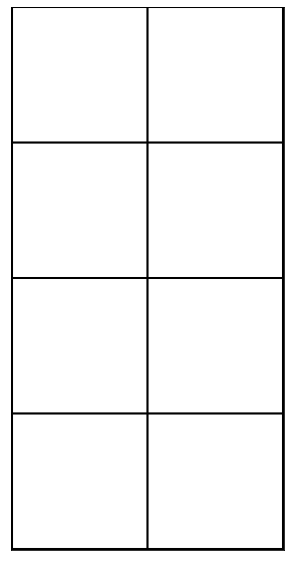

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6199, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 2 [4000/40000 (20%)]	 Loss: 0.619947
Batch ID: 1000


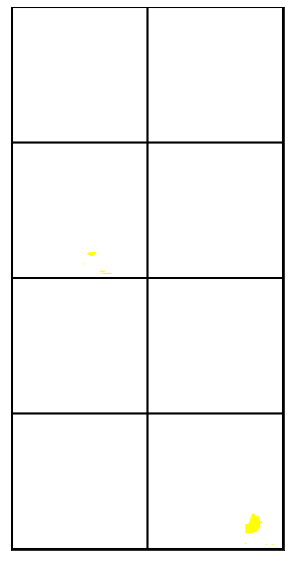

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6342, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 2 [6000/40000 (30%)]	 Loss: 0.634196
Batch ID: 1500


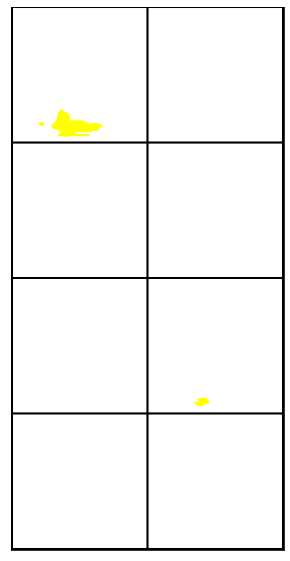

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6224, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 2 [8000/40000 (40%)]	 Loss: 0.622373
Batch ID: 2000


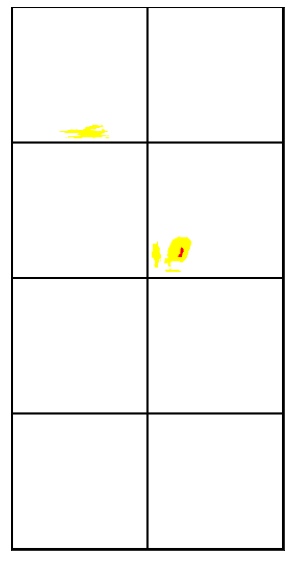

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6394, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 2 [10000/40000 (50%)]	 Loss: 0.639407
Batch ID: 2500


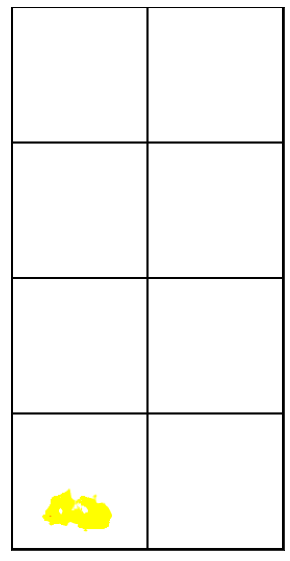

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6295, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 2 [12000/40000 (60%)]	 Loss: 0.629483
Batch ID: 3000


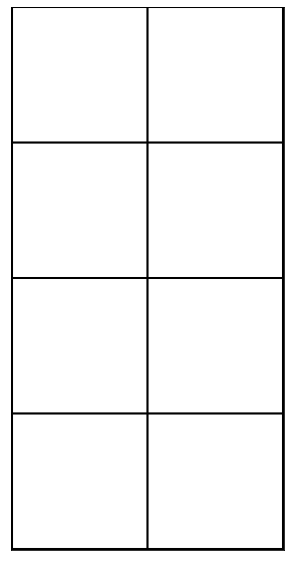

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6583, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 2 [14000/40000 (70%)]	 Loss: 0.658307
Batch ID: 3500


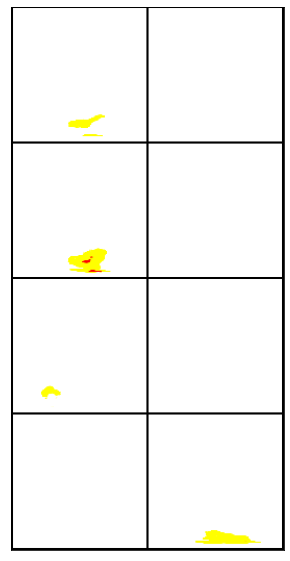

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6092, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 2 [16000/40000 (80%)]	 Loss: 0.609223
Batch ID: 4000


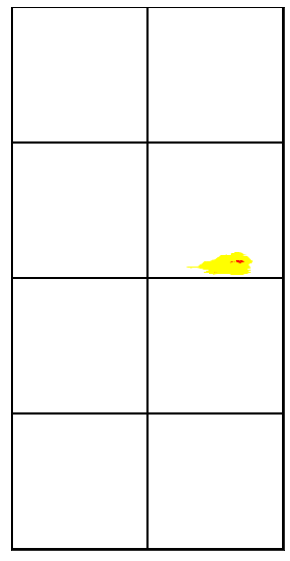

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6397, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 2 [18000/40000 (90%)]	 Loss: 0.639674
Batch ID: 4500


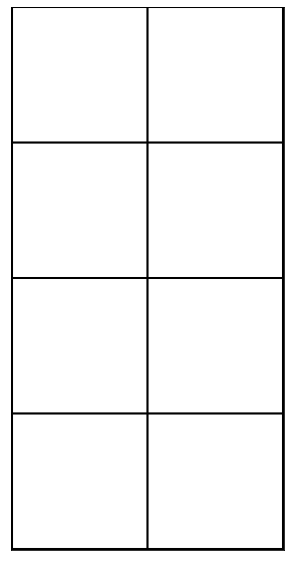

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6348, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 3 [0/40000 (0%)]	 Loss: 0.634762
Batch ID: 0


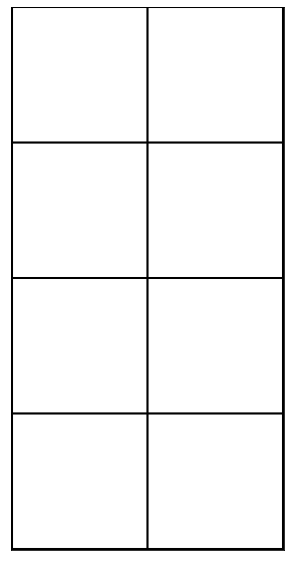

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6184, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 3 [2000/40000 (10%)]	 Loss: 0.618372
Batch ID: 500


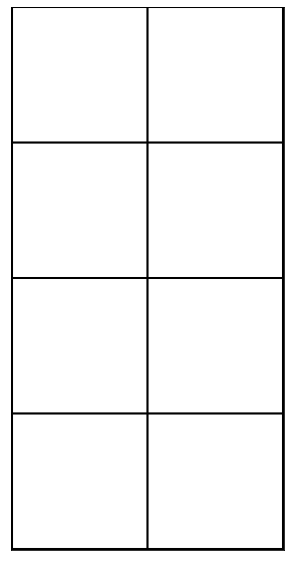

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6270, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 3 [4000/40000 (20%)]	 Loss: 0.626953
Batch ID: 1000


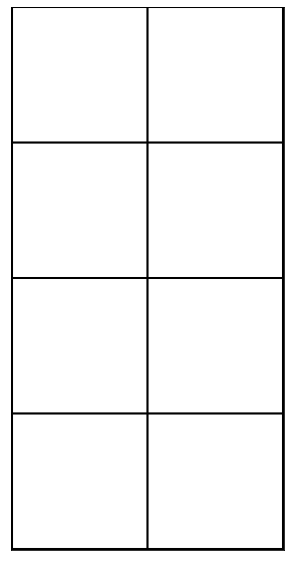

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6187, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 3 [6000/40000 (30%)]	 Loss: 0.618702
Batch ID: 1500


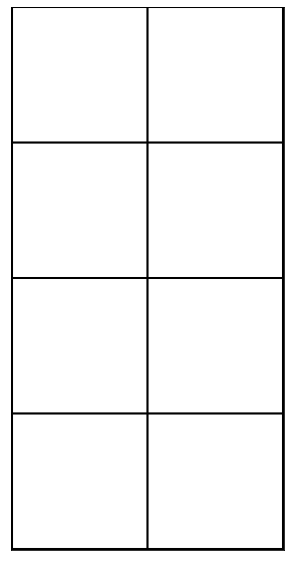

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6051, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 3 [8000/40000 (40%)]	 Loss: 0.605065
Batch ID: 2000


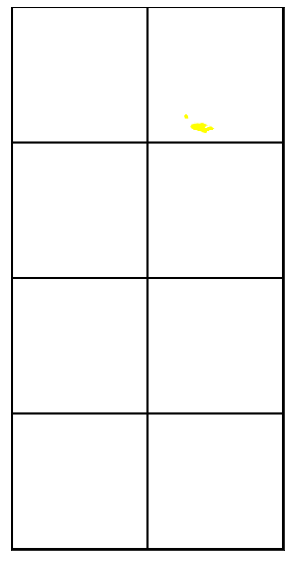

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6600, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 3 [10000/40000 (50%)]	 Loss: 0.659967
Batch ID: 2500


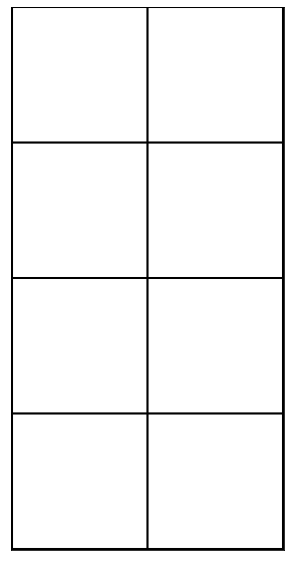

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6252, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 3 [12000/40000 (60%)]	 Loss: 0.625166
Batch ID: 3000


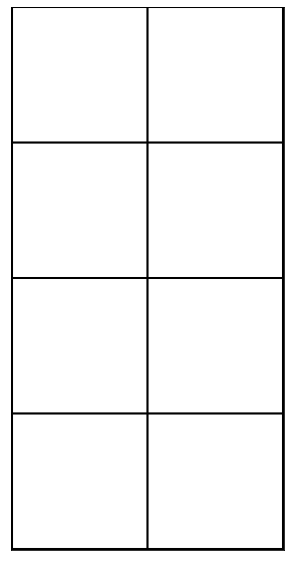

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6363, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 3 [14000/40000 (70%)]	 Loss: 0.636298
Batch ID: 3500


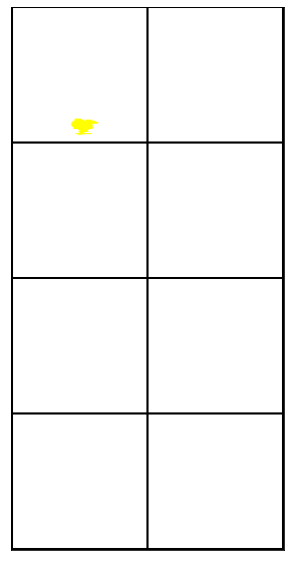

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6416, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 3 [16000/40000 (80%)]	 Loss: 0.641640
Batch ID: 4000


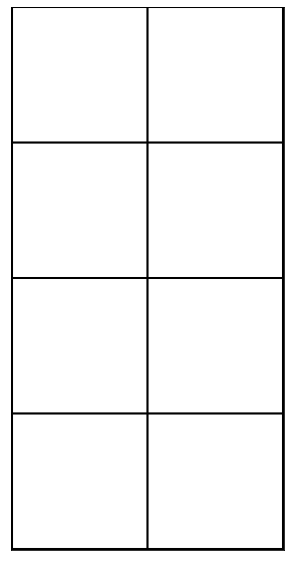

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6195, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 3 [18000/40000 (90%)]	 Loss: 0.619478
Batch ID: 4500


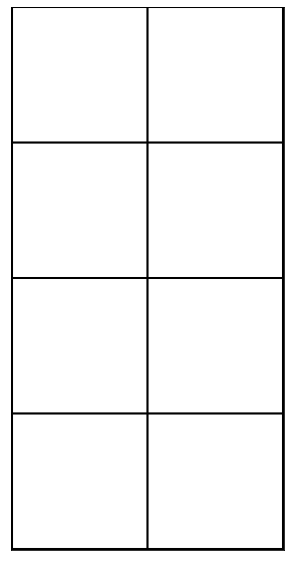

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6575, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 4 [0/40000 (0%)]	 Loss: 0.657541
Batch ID: 0


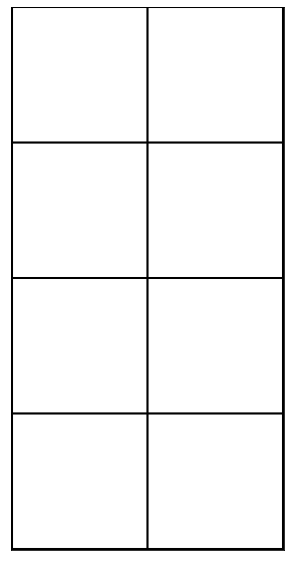

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6674, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 4 [2000/40000 (10%)]	 Loss: 0.667377
Batch ID: 500


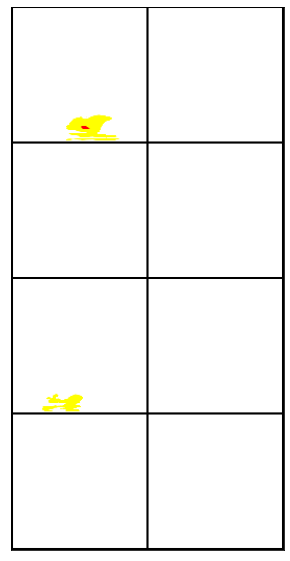

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6260, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 4 [4000/40000 (20%)]	 Loss: 0.625989
Batch ID: 1000


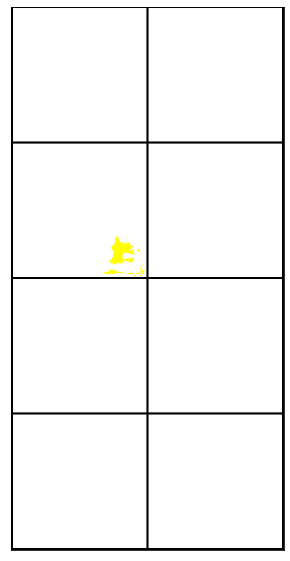

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6190, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 4 [6000/40000 (30%)]	 Loss: 0.619020
Batch ID: 1500


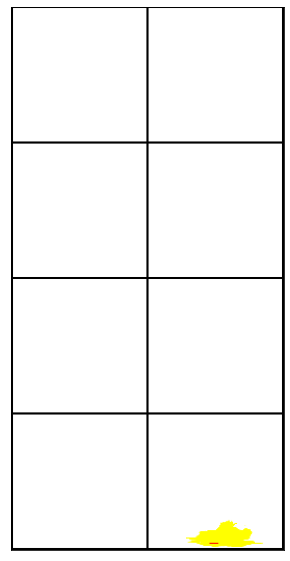

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6312, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 4 [8000/40000 (40%)]	 Loss: 0.631174
Batch ID: 2000


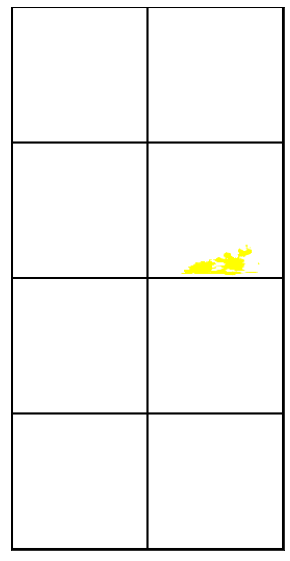

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6287, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 4 [10000/40000 (50%)]	 Loss: 0.628674
Batch ID: 2500


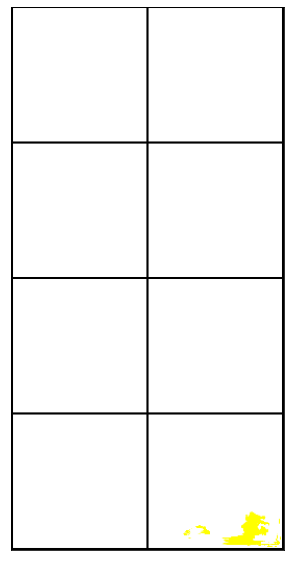

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6222, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 4 [12000/40000 (60%)]	 Loss: 0.622187
Batch ID: 3000


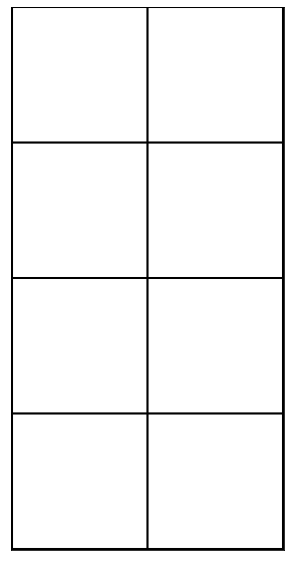

In [0]:
optim = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-5)
criterion = nn.BCEWithLogitsLoss()
scheduler = StepLR(optim, step_size=2, gamma=0.01)
for epoch in range(1, 10):
    train(model, criterion, device, train_loader, optim, epoch)
    scheduler.step()